## Reference

[1] [超簡單台股每日爬蟲教學](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE%E5%8F%B0%E8%82%A1%E6%AF%8F%E6%97%A5%E7%88%AC%E8%9F%B2%E6%95%99%E5%AD%B8/)

***


# 股票收盤價日線資料探索

### How to use 'pandas' and 'matplotlib' to explore the data?
 
 - Try to use simple method to estimate the risk level of stock.
 
 
 - The most important is understanding risk level
 
 
 - So, We need to estimate the stock's volatility for inventors.
 
 
 - But, if statistic property of price yesterday and today are different, we coundn't estimator the stock's volatility today.
 
 

## Loading dataset

 - Using db of TWstock2 to query dataset.

In [2]:
# Loading package

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np


/Users/chibaryowei/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
db = sqlite3.connect('TWStock_2')

# 挑選一些台灣的代表性股票
stocks_dict = {}

#台積電2330
stocks_dict.update({'tsmc': pd.read_sql(con=db,sql='SELECT * FROM "2330"')})
#台塑化6505
stocks_dict.update({'fpc':pd.read_sql(con=db,sql='SELECT * FROM "6505"')})
#鴻海2317
stocks_dict.update({'foxconn':pd.read_sql(con=db,sql='SELECT * FROM "2317"')})
#中華電2412
stocks_dict.update({'cht':pd.read_sql(con=db,sql='SELECT * FROM "2412"')})
#台塑1301
stocks_dict.update({'fpg':pd.read_sql(con=db,sql='SELECT * FROM "1301"')})
#台化1326
stocks_dict.update({'fcfc':pd.read_sql(con=db,sql='SELECT * FROM "1326"')})
#國泰金2882
stocks_dict.update({'cfh':pd.read_sql(con=db,sql='SELECT * FROM "2882"')})
#南亞1303
stocks_dict.update({'ny':pd.read_sql(con=db,sql='SELECT * FROM "1303"')})
#富邦金2881
stocks_dict.update({'fubon':pd.read_sql(con=db,sql='SELECT * FROM "2881"')})
#大立光3008
stocks_dict.update({'largan':pd.read_sql(con=db,sql='SELECT * FROM "3008"')})

## 繪製基本股價走勢圖


In [13]:
# for example
stocks_dict['largan'].head()

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
0,659,大立光,"1,289,853","1,449","6,193,866,750","4,720.00","4,900.00","4,685.00","4,745.00",+,70.0,"4,740.00",3,"4,745.00",3,26.12,2019-05-06 00:00:00
1,659,大立光,"715,608",843,"3,439,453,000","4,800.00","4,840.00","4,770.00","4,775.00",+,30.0,"4,775.00",2,"4,785.00",1,26.28,2019-05-07 00:00:00
2,659,大立光,"651,518",734,"3,094,973,450","4,700.00","4,810.00","4,690.00","4,750.00",-,25.0,"4,745.00",7,"4,755.00",2,26.15,2019-05-08 00:00:00
3,659,大立光,"1,521,610","1,863","6,908,255,350","4,720.00","4,725.00","4,400.00","4,410.00",-,340.0,"4,410.00",9,"4,445.00",2,24.27,2019-05-09 00:00:00
4,659,大立光,"971,401","1,061","4,313,387,470","4,450.00","4,510.00","4,365.00","4,455.00",+,45.0,"4,455.00",1,"4,465.00",5,24.52,2019-05-10 00:00:00


In [15]:
'''
創造可以畫圖的 data.frame
'''

# 將 ‘largan’ save df_test
df_test = stocks_dict['largan'].copy()

# index transfer to Date
df_test.index = pd.to_datetime(df_test['Date'])

# catch '證券名稱','收盤價' two column
df_test = df_test[['證券名稱','收盤價']]

# transfer column names
df_test.columns = ['stock_code','close']

# "close"'s format is character and common
# step 1: replace common ','
# step 2: character  ->  pd.to_numeric
df_test['close'] = df_test['close'].apply(lambda x:x.replace(',',''))
df_test['close'] = pd.to_numeric(df_test['close'])


In [16]:
df_test.head()

,stock_code,close
Date,,
2019-05-06,大立光,4745.0
2019-05-07,大立光,4775.0
2019-05-08,大立光,4750.0
2019-05-09,大立光,4410.0
2019-05-10,大立光,4455.0


In [17]:
'''
在畫圖之前，
我們先整理我們的資料，將每個股票整理成股票名稱與收盤價的表格形式，
其中，因為收盤價被存為字串形式，我們也必須轉為數值形式做進一個的運算
'''

for key in stocks_dict.keys():
    df = stocks_dict[key]
    df.index = df['Date']
    df.index = pd.to_datetime(df.index)
    df = df[['證券名稱','收盤價']]
    df['收盤價'] = pd.to_numeric(df['收盤價'].apply(lambda x:x.replace(',','')),errors='coerce')
    df.columns = ['stock_code','close']
    stocks_dict[key] = df

/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [18]:
stocks_dict['tsmc'].head()

,stock_code,close
Date,,
2019-05-06,台積電,259.0
2019-05-07,台積電,262.5
2019-05-08,台積電,260.0
2019-05-09,台積電,256.5
2019-05-10,台積電,256.0


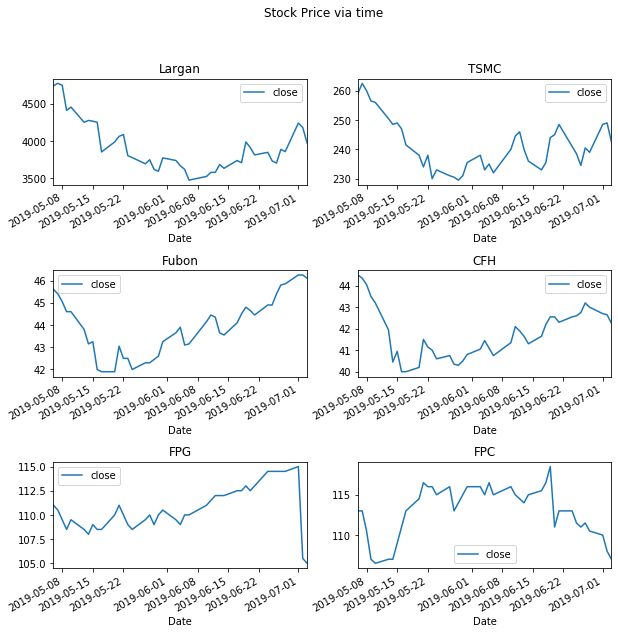

In [19]:
from_date = '2019-05-01'

fig,ax = plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.8)
stocks_dict['largan'][from_date:].plot(ax=ax[0,0])
ax[0,0].set_title('Largan')
stocks_dict['tsmc'][from_date:].plot(ax=ax[0,1])
ax[0,1].set_title('TSMC')
stocks_dict['fubon'][from_date:].plot(ax=ax[1,0])
ax[1,0].set_title('Fubon')
stocks_dict['cfh'][from_date:].plot(ax=ax[1,1])
ax[1,1].set_title('CFH')
stocks_dict['fpg'][from_date:].plot(ax=ax[2,0])
ax[2,0].set_title('FPG')
stocks_dict['fpc'][from_date:].plot(ax=ax[2,1])
ax[2,1].set_title('FPC')
fig.suptitle('Stock Price via time')
plt.show()

## 圖像判斷法

 - 用標準差這個最常見的方式來測量波動程度。
 
 
 - 但是問題是，如果昨天的股票的統計性質與明天的股票的統計性質相差很大的話，我們就很難相信我們用過去股價估計出來的波動程度可以有效的衡量明天股價的波動程度。
 
 
 - 我們希望我們前, 後天的股價是'獨立'且有'相似的分配'，我們這邊可以用很簡單的圖像方式來呈現前, 後天股價的關係。


In [27]:
# for example: tsmc
from_date = '2019-05-09'
df = stocks_dict['tsmc'].copy()

print(df[from_date:])              #      2019-06-18 ~ 2019-07-03
print(df[from_date:].iloc[ :-1,])  # df_p 2019-06-18 ~ 2019-07-02 (少最後一筆) 前幾天 past
print(df[from_date:].iloc[1:  ,])  # df_a 2019-06-19 ~ 2019-07-03 (少第一筆)  後幾天 after

           stock_code  close
Date                        
2019-06-18        台積電  235.5
2019-06-19        台積電  244.0
2019-06-20        台積電  245.0
2019-06-21        台積電  248.5
2019-06-24        台積電  241.0
2019-06-25        台積電  238.5
2019-06-26        台積電  234.5
2019-06-27        台積電  240.5
2019-06-28        台積電  239.0
2019-07-01        台積電  248.5
2019-07-01        台積電  248.5
2019-07-02        台積電  249.0
2019-07-03        台積電  242.5
           stock_code  close
Date                        
2019-06-18        台積電  235.5
2019-06-19        台積電  244.0
2019-06-20        台積電  245.0
2019-06-21        台積電  248.5
2019-06-24        台積電  241.0
2019-06-25        台積電  238.5
2019-06-26        台積電  234.5
2019-06-27        台積電  240.5
2019-06-28        台積電  239.0
2019-07-01        台積電  248.5
2019-07-01        台積電  248.5
2019-07-02        台積電  249.0
           stock_code  close
Date                        
2019-06-19        台積電  244.0
2019-06-20        台積電  245.0
2019-06-21        台積電  248.5
2019-06-24    

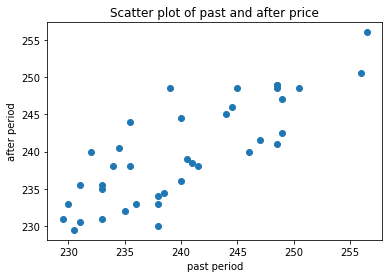

In [42]:
#用TSMC做例子

from_date = '2019-05-09'

df = stocks_dict['tsmc'].copy()
df_p = df[from_date:].iloc[:-1,:]
df_a = df[from_date:].iloc[1:,:]
plt.scatter(np.array(df_p['close']),np.array(df_a['close']))
plt.xlabel("past period")
plt.ylabel("after period")
plt.title("Scatter plot of past and after price")
plt.show()

([array([6., 5., 3., 2., 0., 1., 3., 0., 2., 1.]),
  array([0., 3., 2., 5., 3., 2., 4., 0., 0., 0.])],
 array([229.5 , 232.55, 235.6 , 238.65, 241.7 , 244.75, 247.8 , 250.85,
        253.9 , 256.95, 260.  ]),
 <a list of 2 Lists of Patches objects>)

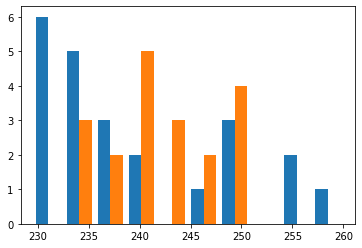

In [43]:
# Histogram
plt.hist([np.array(df['2019-05-08':'2019-06-10']['close']),np.array(df['2019-06-10':]['close'])])

可發現，前一期的股價與後一期股價兩者之間有正向關係。
不直接計算股價，而是計算兩個不同的報酬率。

## Return Rate

 - Linear Return Rate
$$r_{t}^{L}=\frac{P_{t}}{P_{t-1}}-1$$

 - Continuous Return Rate
$$r_{t}^{C}=ln(\frac{P_{t}}{P_{t-1}})$$

In [44]:
from_date = '2019-06-10'
df = df[from_date:]
df.head()

,stock_code,close
Date,,
2019-06-10,台積電,240.0
2019-06-11,台積電,244.5
2019-06-12,台積電,246.0
2019-06-13,台積電,240.0
2019-06-14,台積電,236.0


#### Linear Return Rate

In [45]:
df['linear_return_rate'] = df['close'].pct_change()

In [46]:
df.head()

,stock_code,close,linear_return_rate
Date,,,
2019-06-10,台積電,240.0,NaN
2019-06-11,台積電,244.5,0.018750
2019-06-12,台積電,246.0,0.006135
2019-06-13,台積電,240.0,-0.024390
2019-06-14,台積電,236.0,-0.016667


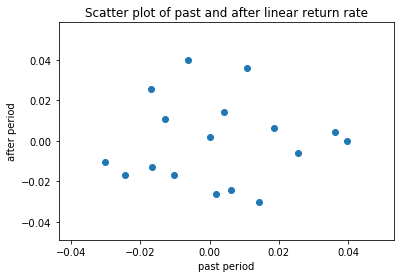

In [48]:
df_lrp = df.iloc[:-1,:]
df_lra = df.iloc[1:,:]

plt.scatter(np.array(df_lrp['linear_return_rate']),np.array(df_lra['linear_return_rate']))
plt.xlabel("past period")
plt.ylabel("after period")
plt.title("Scatter plot of past and after linear return rate")
plt.show()

可以發現，當我們做報酬率的轉換後，其前後期關係更接近於**獨立**關係，我們可以更有信心估計報酬率波動程度。而當前後期股價接近時，根據泰勒展開式，我們支到線性報酬率與連續報酬率的值近似。所以我們可以用以下的統計模型

$$ln(\frac{P_{t}}{P_{t-1}})\sim N(\mu,\sigma^2)$$

 - 可利用一些常見的方法(e.g. MLE)去估計參數
 - 進而得到我們對於報酬的分配估計，而在這種情況下我們就可以評估我們的風險水準